In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklift.models import TwoModels
import lightgbm as lgb
from sklift.metrics import qini_auc_score
from sklift.viz import plot_qini_curve
from imblearn.pipeline import Pipeline

%matplotlib inline

In [2]:
#Read the dataset
df = pd.read_csv("criteo-uplift-data.csv")

In [3]:
df.shape

(13979592, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
dtypes: float64(12), int64(4)
memory usage: 1.7 GB


In [5]:
df.isnull().sum()

f0            0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
treatment     0
conversion    0
visit         0
exposure      0
dtype: int64

In [6]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07
mean,1.962030e+01,1.006998e+01,8.446582e+00,4.178923e+00,1.033884e+01,4.028513e+00,-4.155356e+00,5.101765e+00,3.933581e+00,1.602764e+01,5.333396e+00,-1.709672e-01,8.500001e-01,2.916680e-03,4.699200e-02,3.063122e-02
std,5.377464e+00,1.047557e-01,2.993161e-01,1.336645e+00,3.433081e-01,4.310974e-01,4.577914e+00,1.205248e+00,5.665958e-02,7.018975e+00,1.682288e-01,2.283277e-02,3.570713e-01,5.392748e-02,2.116217e-01,1.723164e-01
min,1.261636e+01,1.005965e+01,8.214383e+00,-8.398387e+00,1.028053e+01,-9.011892e+00,-3.142978e+01,4.833815e+00,3.635107e+00,1.319006e+01,5.300375e+00,-1.383941e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.261636e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-6.699321e+00,4.833815e+00,3.910792e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.192341e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-2.411115e+00,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.443646e+01,1.005965e+01,8.723335e+00,4.679882e+00,1.028053e+01,4.115453e+00,2.944427e-01,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.674526e+01,1.634419e+01,9.051962e+00,4.679882e+00,2.112351e+01,4.115453e+00,2.944427e-01,1.199840e+01,3.971858e+00,7.529502e+01,6.473917e+00,-1.686792e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot:>

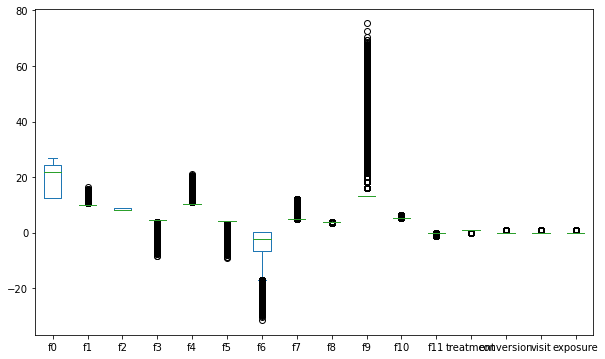

In [7]:
df.plot.box(figsize=(10,6))

In [8]:
df['treatment'].value_counts(normalize = True)

1    0.85
0    0.15
Name: treatment, dtype: float64

<AxesSubplot:xlabel='treatment', ylabel='count'>

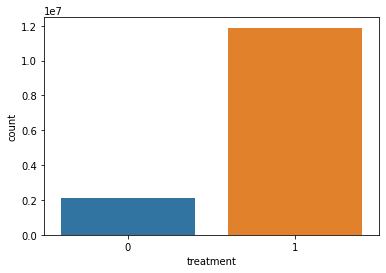

In [9]:
sns.countplot(x=df.treatment)

In [10]:
df['visit'].value_counts(normalize = True)

0    0.953008
1    0.046992
Name: visit, dtype: float64

<AxesSubplot:xlabel='visit', ylabel='count'>

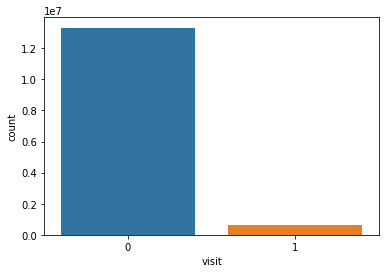

In [11]:
sns.countplot(x=df.visit)

In [12]:
df['conversion'].value_counts(normalize = True)

0    0.997083
1    0.002917
Name: conversion, dtype: float64

<AxesSubplot:xlabel='conversion', ylabel='count'>

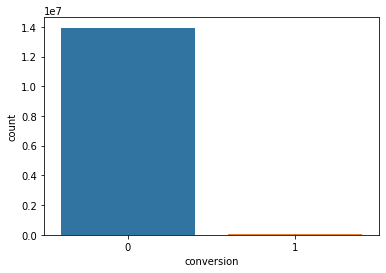

In [13]:
sns.countplot(x=df.conversion)

In [14]:
df['exposure'].value_counts(normalize = True)

0    0.969369
1    0.030631
Name: exposure, dtype: float64

<AxesSubplot:xlabel='exposure', ylabel='count'>

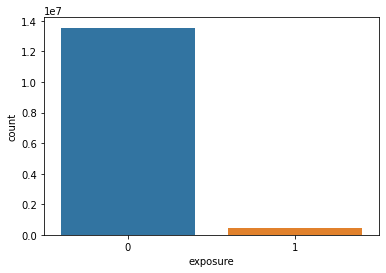

In [15]:
sns.countplot(x=df.exposure)

Text(0.5, 1.0, 'Feature Heatmap')

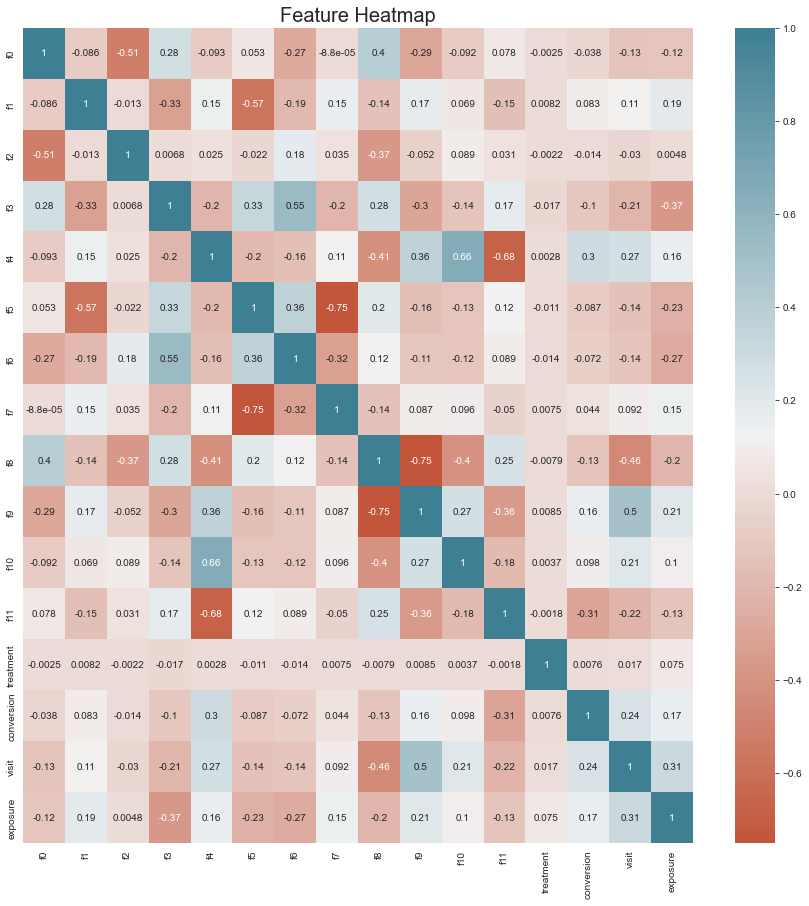

In [16]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,15))

sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True)
plt.title("Feature Heatmap", fontsize = 20)

In [17]:
pd.crosstab(df.treatment, df.visit, normalize='index')

visit,0,1
treatment,,
0,0.961799,0.038201
1,0.951457,0.048543


In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [19]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [20]:
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [21]:
X = df.drop(columns=['conversion','treatment'])

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 14 columns):
 #   Column    Dtype  
---  ------    -----  
 0   f0        float64
 1   f1        float64
 2   f2        float64
 3   f3        float64
 4   f4        float64
 5   f5        float64
 6   f6        float64
 7   f7        float64
 8   f8        float64
 9   f9        float64
 10  f10       float64
 11  f11       float64
 12  visit     int64  
 13  exposure  int64  
dtypes: float64(12), int64(2)
memory usage: 1.5 GB


In [23]:
treatment = df['treatment']

In [24]:
y = df['conversion']

In [25]:
X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(X,treatment,y, random_state=23, stratify=treatment, test_size=0.33)

In [26]:
print(X_train.shape, X_test.shape, treatment_train.shape, treatment_test.shape, y_train.shape, y_test.shape)

(9366326, 14) (4613266, 14) (9366326,) (4613266,) (9366326,) (4613266,)


In [27]:
treatment_model = CatBoostClassifier(random_state=23)
control_model = CatBoostClassifier(random_state=23)
tm = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='vanilla')

In [28]:
tm = tm.fit(X_train, y_train, treatment_train)

Learning rate set to 0.227502
0:	learn: 0.1880856	total: 651ms	remaining: 10m 50s
1:	learn: 0.0297964	total: 953ms	remaining: 7m 55s
2:	learn: 0.0103677	total: 1.17s	remaining: 6m 29s
3:	learn: 0.0072316	total: 1.44s	remaining: 5m 57s
4:	learn: 0.0064247	total: 1.66s	remaining: 5m 31s
5:	learn: 0.0060896	total: 2.23s	remaining: 6m 9s
6:	learn: 0.0059608	total: 2.48s	remaining: 5m 51s
7:	learn: 0.0058619	total: 2.7s	remaining: 5m 35s
8:	learn: 0.0058018	total: 2.97s	remaining: 5m 27s
9:	learn: 0.0057543	total: 3.23s	remaining: 5m 20s
10:	learn: 0.0057230	total: 3.48s	remaining: 5m 13s
11:	learn: 0.0057068	total: 3.73s	remaining: 5m 6s
12:	learn: 0.0056964	total: 3.99s	remaining: 5m 3s
13:	learn: 0.0056875	total: 4.23s	remaining: 4m 57s
14:	learn: 0.0056718	total: 4.49s	remaining: 4m 54s
15:	learn: 0.0056601	total: 4.73s	remaining: 4m 51s
16:	learn: 0.0056532	total: 4.96s	remaining: 4m 46s
17:	learn: 0.0056352	total: 5.23s	remaining: 4m 45s
18:	learn: 0.0056227	total: 5.48s	remaining: 4m

157:	learn: 0.0049804	total: 44.1s	remaining: 3m 55s
158:	learn: 0.0049792	total: 44.4s	remaining: 3m 54s
159:	learn: 0.0049746	total: 44.7s	remaining: 3m 54s
160:	learn: 0.0049738	total: 44.9s	remaining: 3m 53s
161:	learn: 0.0049708	total: 45.2s	remaining: 3m 53s
162:	learn: 0.0049660	total: 45.4s	remaining: 3m 53s
163:	learn: 0.0049621	total: 45.7s	remaining: 3m 52s
164:	learn: 0.0049579	total: 46s	remaining: 3m 52s
165:	learn: 0.0049529	total: 46.2s	remaining: 3m 52s
166:	learn: 0.0049494	total: 46.5s	remaining: 3m 51s
167:	learn: 0.0049483	total: 46.7s	remaining: 3m 51s
168:	learn: 0.0049466	total: 47s	remaining: 3m 51s
169:	learn: 0.0049432	total: 47.3s	remaining: 3m 50s
170:	learn: 0.0049417	total: 47.5s	remaining: 3m 50s
171:	learn: 0.0049392	total: 47.8s	remaining: 3m 50s
172:	learn: 0.0049348	total: 48s	remaining: 3m 49s
173:	learn: 0.0049323	total: 48.3s	remaining: 3m 49s
174:	learn: 0.0049304	total: 48.6s	remaining: 3m 49s
175:	learn: 0.0049261	total: 48.9s	remaining: 3m 48s

311:	learn: 0.0045011	total: 1m 28s	remaining: 3m 15s
312:	learn: 0.0044968	total: 1m 28s	remaining: 3m 15s
313:	learn: 0.0044936	total: 1m 29s	remaining: 3m 14s
314:	learn: 0.0044913	total: 1m 29s	remaining: 3m 14s
315:	learn: 0.0044872	total: 1m 29s	remaining: 3m 14s
316:	learn: 0.0044845	total: 1m 30s	remaining: 3m 14s
317:	learn: 0.0044819	total: 1m 30s	remaining: 3m 13s
318:	learn: 0.0044803	total: 1m 30s	remaining: 3m 13s
319:	learn: 0.0044796	total: 1m 30s	remaining: 3m 12s
320:	learn: 0.0044786	total: 1m 31s	remaining: 3m 12s
321:	learn: 0.0044758	total: 1m 31s	remaining: 3m 12s
322:	learn: 0.0044710	total: 1m 31s	remaining: 3m 11s
323:	learn: 0.0044669	total: 1m 31s	remaining: 3m 11s
324:	learn: 0.0044631	total: 1m 32s	remaining: 3m 11s
325:	learn: 0.0044593	total: 1m 32s	remaining: 3m 10s
326:	learn: 0.0044579	total: 1m 32s	remaining: 3m 10s
327:	learn: 0.0044533	total: 1m 32s	remaining: 3m 10s
328:	learn: 0.0044490	total: 1m 33s	remaining: 3m 10s
329:	learn: 0.0044471	total:

465:	learn: 0.0041283	total: 2m 13s	remaining: 2m 33s
466:	learn: 0.0041257	total: 2m 14s	remaining: 2m 33s
467:	learn: 0.0041239	total: 2m 14s	remaining: 2m 32s
468:	learn: 0.0041228	total: 2m 14s	remaining: 2m 32s
469:	learn: 0.0041203	total: 2m 15s	remaining: 2m 32s
470:	learn: 0.0041182	total: 2m 15s	remaining: 2m 32s
471:	learn: 0.0041155	total: 2m 15s	remaining: 2m 31s
472:	learn: 0.0041133	total: 2m 15s	remaining: 2m 31s
473:	learn: 0.0041116	total: 2m 16s	remaining: 2m 31s
474:	learn: 0.0041102	total: 2m 16s	remaining: 2m 30s
475:	learn: 0.0041087	total: 2m 16s	remaining: 2m 30s
476:	learn: 0.0041068	total: 2m 16s	remaining: 2m 30s
477:	learn: 0.0041026	total: 2m 17s	remaining: 2m 29s
478:	learn: 0.0041008	total: 2m 17s	remaining: 2m 29s
479:	learn: 0.0041002	total: 2m 17s	remaining: 2m 29s
480:	learn: 0.0040987	total: 2m 17s	remaining: 2m 28s
481:	learn: 0.0040975	total: 2m 18s	remaining: 2m 28s
482:	learn: 0.0040954	total: 2m 18s	remaining: 2m 28s
483:	learn: 0.0040939	total:

618:	learn: 0.0038570	total: 2m 54s	remaining: 1m 47s
619:	learn: 0.0038553	total: 2m 55s	remaining: 1m 47s
620:	learn: 0.0038532	total: 2m 55s	remaining: 1m 47s
621:	learn: 0.0038509	total: 2m 55s	remaining: 1m 46s
622:	learn: 0.0038493	total: 2m 55s	remaining: 1m 46s
623:	learn: 0.0038473	total: 2m 56s	remaining: 1m 46s
624:	learn: 0.0038464	total: 2m 56s	remaining: 1m 45s
625:	learn: 0.0038442	total: 2m 56s	remaining: 1m 45s
626:	learn: 0.0038441	total: 2m 56s	remaining: 1m 45s
627:	learn: 0.0038432	total: 2m 57s	remaining: 1m 44s
628:	learn: 0.0038394	total: 2m 57s	remaining: 1m 44s
629:	learn: 0.0038369	total: 2m 57s	remaining: 1m 44s
630:	learn: 0.0038358	total: 2m 58s	remaining: 1m 44s
631:	learn: 0.0038352	total: 2m 58s	remaining: 1m 43s
632:	learn: 0.0038343	total: 2m 58s	remaining: 1m 43s
633:	learn: 0.0038328	total: 2m 58s	remaining: 1m 43s
634:	learn: 0.0038313	total: 2m 59s	remaining: 1m 42s
635:	learn: 0.0038290	total: 2m 59s	remaining: 1m 42s
636:	learn: 0.0038254	total:

771:	learn: 0.0036008	total: 3m 42s	remaining: 1m 5s
772:	learn: 0.0035983	total: 3m 42s	remaining: 1m 5s
773:	learn: 0.0035971	total: 3m 43s	remaining: 1m 5s
774:	learn: 0.0035955	total: 3m 43s	remaining: 1m 4s
775:	learn: 0.0035948	total: 3m 43s	remaining: 1m 4s
776:	learn: 0.0035935	total: 3m 43s	remaining: 1m 4s
777:	learn: 0.0035917	total: 3m 44s	remaining: 1m 3s
778:	learn: 0.0035912	total: 3m 44s	remaining: 1m 3s
779:	learn: 0.0035899	total: 3m 44s	remaining: 1m 3s
780:	learn: 0.0035889	total: 3m 44s	remaining: 1m 3s
781:	learn: 0.0035880	total: 3m 45s	remaining: 1m 2s
782:	learn: 0.0035864	total: 3m 45s	remaining: 1m 2s
783:	learn: 0.0035847	total: 3m 45s	remaining: 1m 2s
784:	learn: 0.0035827	total: 3m 45s	remaining: 1m 1s
785:	learn: 0.0035789	total: 3m 45s	remaining: 1m 1s
786:	learn: 0.0035773	total: 3m 46s	remaining: 1m 1s
787:	learn: 0.0035754	total: 3m 46s	remaining: 1m
788:	learn: 0.0035746	total: 3m 46s	remaining: 1m
789:	learn: 0.0035726	total: 3m 46s	remaining: 1m
79

928:	learn: 0.0033654	total: 4m 22s	remaining: 20.1s
929:	learn: 0.0033646	total: 4m 22s	remaining: 19.8s
930:	learn: 0.0033640	total: 4m 22s	remaining: 19.5s
931:	learn: 0.0033631	total: 4m 23s	remaining: 19.2s
932:	learn: 0.0033625	total: 4m 23s	remaining: 18.9s
933:	learn: 0.0033608	total: 4m 23s	remaining: 18.6s
934:	learn: 0.0033592	total: 4m 23s	remaining: 18.3s
935:	learn: 0.0033579	total: 4m 24s	remaining: 18.1s
936:	learn: 0.0033560	total: 4m 24s	remaining: 17.8s
937:	learn: 0.0033545	total: 4m 24s	remaining: 17.5s
938:	learn: 0.0033535	total: 4m 24s	remaining: 17.2s
939:	learn: 0.0033531	total: 4m 25s	remaining: 16.9s
940:	learn: 0.0033519	total: 4m 25s	remaining: 16.6s
941:	learn: 0.0033505	total: 4m 25s	remaining: 16.4s
942:	learn: 0.0033492	total: 4m 25s	remaining: 16.1s
943:	learn: 0.0033475	total: 4m 26s	remaining: 15.8s
944:	learn: 0.0033471	total: 4m 26s	remaining: 15.5s
945:	learn: 0.0033461	total: 4m 26s	remaining: 15.2s
946:	learn: 0.0033453	total: 4m 26s	remaining:

83:	learn: 0.0083292	total: 1m 44s	remaining: 18m 59s
84:	learn: 0.0083272	total: 1m 45s	remaining: 18m 58s
85:	learn: 0.0083255	total: 1m 46s	remaining: 18m 57s
86:	learn: 0.0083230	total: 1m 48s	remaining: 18m 55s
87:	learn: 0.0083199	total: 1m 49s	remaining: 18m 55s
88:	learn: 0.0083178	total: 1m 50s	remaining: 18m 53s
89:	learn: 0.0083164	total: 1m 51s	remaining: 18m 52s
90:	learn: 0.0083134	total: 1m 53s	remaining: 18m 52s
91:	learn: 0.0083117	total: 1m 54s	remaining: 18m 52s
92:	learn: 0.0083085	total: 1m 56s	remaining: 18m 51s
93:	learn: 0.0083056	total: 1m 57s	remaining: 18m 49s
94:	learn: 0.0083017	total: 1m 58s	remaining: 18m 48s
95:	learn: 0.0082983	total: 1m 59s	remaining: 18m 47s
96:	learn: 0.0082953	total: 2m 1s	remaining: 18m 47s
97:	learn: 0.0082928	total: 2m 2s	remaining: 18m 44s
98:	learn: 0.0082913	total: 2m 3s	remaining: 18m 43s
99:	learn: 0.0082882	total: 2m 4s	remaining: 18m 43s
100:	learn: 0.0082863	total: 2m 6s	remaining: 18m 41s
101:	learn: 0.0082845	total: 2m 

234:	learn: 0.0080116	total: 4m 51s	remaining: 15m 48s
235:	learn: 0.0080095	total: 4m 52s	remaining: 15m 46s
236:	learn: 0.0080090	total: 4m 53s	remaining: 15m 44s
237:	learn: 0.0080075	total: 4m 54s	remaining: 15m 43s
238:	learn: 0.0080055	total: 4m 55s	remaining: 15m 42s
239:	learn: 0.0080038	total: 4m 57s	remaining: 15m 41s
240:	learn: 0.0080029	total: 4m 58s	remaining: 15m 39s
241:	learn: 0.0080010	total: 4m 59s	remaining: 15m 38s
242:	learn: 0.0079995	total: 5m	remaining: 15m 36s
243:	learn: 0.0079982	total: 5m 1s	remaining: 15m 35s
244:	learn: 0.0079966	total: 5m 3s	remaining: 15m 34s
245:	learn: 0.0079958	total: 5m 4s	remaining: 15m 33s
246:	learn: 0.0079946	total: 5m 5s	remaining: 15m 32s
247:	learn: 0.0079935	total: 5m 7s	remaining: 15m 31s
248:	learn: 0.0079915	total: 5m 8s	remaining: 15m 30s
249:	learn: 0.0079890	total: 5m 9s	remaining: 15m 29s
250:	learn: 0.0079877	total: 5m 10s	remaining: 15m 27s
251:	learn: 0.0079865	total: 5m 12s	remaining: 15m 26s
252:	learn: 0.0079847

385:	learn: 0.0077672	total: 8m 6s	remaining: 12m 53s
386:	learn: 0.0077660	total: 8m 7s	remaining: 12m 51s
387:	learn: 0.0077650	total: 8m 8s	remaining: 12m 50s
388:	learn: 0.0077635	total: 8m 9s	remaining: 12m 49s
389:	learn: 0.0077630	total: 8m 11s	remaining: 12m 47s
390:	learn: 0.0077619	total: 8m 12s	remaining: 12m 46s
391:	learn: 0.0077608	total: 8m 13s	remaining: 12m 45s
392:	learn: 0.0077583	total: 8m 15s	remaining: 12m 44s
393:	learn: 0.0077572	total: 8m 16s	remaining: 12m 43s
394:	learn: 0.0077559	total: 8m 17s	remaining: 12m 41s
395:	learn: 0.0077543	total: 8m 18s	remaining: 12m 40s
396:	learn: 0.0077530	total: 8m 19s	remaining: 12m 39s
397:	learn: 0.0077522	total: 8m 20s	remaining: 12m 37s
398:	learn: 0.0077512	total: 8m 22s	remaining: 12m 36s
399:	learn: 0.0077491	total: 8m 23s	remaining: 12m 34s
400:	learn: 0.0077479	total: 8m 24s	remaining: 12m 34s
401:	learn: 0.0077461	total: 8m 26s	remaining: 12m 32s
402:	learn: 0.0077445	total: 8m 27s	remaining: 12m 31s
403:	learn: 0.

535:	learn: 0.0075592	total: 11m 20s	remaining: 9m 49s
536:	learn: 0.0075585	total: 11m 21s	remaining: 9m 47s
537:	learn: 0.0075577	total: 11m 22s	remaining: 9m 46s
538:	learn: 0.0075571	total: 11m 24s	remaining: 9m 45s
539:	learn: 0.0075554	total: 11m 25s	remaining: 9m 43s
540:	learn: 0.0075537	total: 11m 26s	remaining: 9m 42s
541:	learn: 0.0075532	total: 11m 28s	remaining: 9m 41s
542:	learn: 0.0075522	total: 11m 29s	remaining: 9m 40s
543:	learn: 0.0075504	total: 11m 30s	remaining: 9m 38s
544:	learn: 0.0075492	total: 11m 31s	remaining: 9m 37s
545:	learn: 0.0075483	total: 11m 32s	remaining: 9m 36s
546:	learn: 0.0075478	total: 11m 34s	remaining: 9m 34s
547:	learn: 0.0075470	total: 11m 35s	remaining: 9m 33s
548:	learn: 0.0075454	total: 11m 37s	remaining: 9m 32s
549:	learn: 0.0075441	total: 11m 38s	remaining: 9m 31s
550:	learn: 0.0075428	total: 11m 39s	remaining: 9m 30s
551:	learn: 0.0075412	total: 11m 41s	remaining: 9m 29s
552:	learn: 0.0075403	total: 11m 42s	remaining: 9m 27s
553:	learn

686:	learn: 0.0073839	total: 14m 50s	remaining: 6m 45s
687:	learn: 0.0073826	total: 14m 52s	remaining: 6m 44s
688:	learn: 0.0073815	total: 14m 53s	remaining: 6m 43s
689:	learn: 0.0073802	total: 14m 54s	remaining: 6m 41s
690:	learn: 0.0073791	total: 14m 55s	remaining: 6m 40s
691:	learn: 0.0073778	total: 14m 57s	remaining: 6m 39s
692:	learn: 0.0073770	total: 14m 58s	remaining: 6m 38s
693:	learn: 0.0073762	total: 14m 59s	remaining: 6m 36s
694:	learn: 0.0073742	total: 15m	remaining: 6m 35s
695:	learn: 0.0073734	total: 15m 2s	remaining: 6m 34s
696:	learn: 0.0073715	total: 15m 3s	remaining: 6m 32s
697:	learn: 0.0073703	total: 15m 5s	remaining: 6m 31s
698:	learn: 0.0073686	total: 15m 6s	remaining: 6m 30s
699:	learn: 0.0073684	total: 15m 7s	remaining: 6m 29s
700:	learn: 0.0073677	total: 15m 8s	remaining: 6m 27s
701:	learn: 0.0073660	total: 15m 10s	remaining: 6m 26s
702:	learn: 0.0073650	total: 15m 11s	remaining: 6m 25s
703:	learn: 0.0073642	total: 15m 12s	remaining: 6m 23s
704:	learn: 0.007363

837:	learn: 0.0072226	total: 18m 19s	remaining: 3m 32s
838:	learn: 0.0072217	total: 18m 20s	remaining: 3m 31s
839:	learn: 0.0072204	total: 18m 21s	remaining: 3m 29s
840:	learn: 0.0072197	total: 18m 22s	remaining: 3m 28s
841:	learn: 0.0072190	total: 18m 25s	remaining: 3m 27s
842:	learn: 0.0072183	total: 18m 26s	remaining: 3m 26s
843:	learn: 0.0072173	total: 18m 28s	remaining: 3m 24s
844:	learn: 0.0072156	total: 18m 29s	remaining: 3m 23s
845:	learn: 0.0072145	total: 18m 30s	remaining: 3m 22s
846:	learn: 0.0072139	total: 18m 32s	remaining: 3m 20s
847:	learn: 0.0072134	total: 18m 33s	remaining: 3m 19s
848:	learn: 0.0072119	total: 18m 34s	remaining: 3m 18s
849:	learn: 0.0072101	total: 18m 36s	remaining: 3m 16s
850:	learn: 0.0072089	total: 18m 37s	remaining: 3m 15s
851:	learn: 0.0072081	total: 18m 38s	remaining: 3m 14s
852:	learn: 0.0072073	total: 18m 39s	remaining: 3m 12s
853:	learn: 0.0072055	total: 18m 41s	remaining: 3m 11s
854:	learn: 0.0072044	total: 18m 42s	remaining: 3m 10s
855:	learn

988:	learn: 0.0070682	total: 21m 53s	remaining: 14.6s
989:	learn: 0.0070675	total: 21m 54s	remaining: 13.3s
990:	learn: 0.0070655	total: 21m 55s	remaining: 11.9s
991:	learn: 0.0070651	total: 21m 57s	remaining: 10.6s
992:	learn: 0.0070642	total: 21m 58s	remaining: 9.3s
993:	learn: 0.0070636	total: 22m	remaining: 7.97s
994:	learn: 0.0070631	total: 22m 1s	remaining: 6.64s
995:	learn: 0.0070623	total: 22m 3s	remaining: 5.31s
996:	learn: 0.0070617	total: 22m 5s	remaining: 3.99s
997:	learn: 0.0070601	total: 22m 6s	remaining: 2.66s
998:	learn: 0.0070587	total: 22m 8s	remaining: 1.33s
999:	learn: 0.0070582	total: 22m 9s	remaining: 0us


In [29]:
uplift_tm = tm.predict(X_test)

In [30]:
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_tm, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.2577


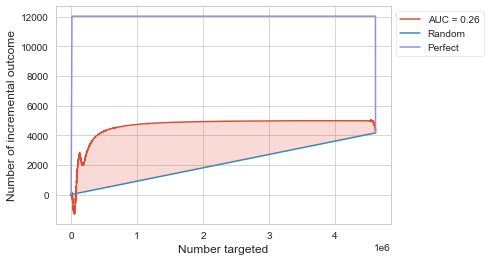

In [31]:
# with ideal Qini curve (red line)
# perfect=True

plot_qini_curve(y_test, uplift_tm, treatment_test, perfect=True);